<a href="https://colab.research.google.com/github/JoshuaThadi/DataScienceEcosystem/blob/main/HouseSalesIKC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Sales in King County, USA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Module 1: Importing Data Sets

In [3]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [4]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1
Display the data types of each column using the function dtypes, then take a screenshot and submit it, include your code in the image.

In [6]:
df.dtypes

,0
Unnamed: 0,int64
id,int64
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64


We use the method describe to obtain a statistical summary of the dataframe.

In [7]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0               0  7129300520  20141013T000000  221900.0       3.0       1.00   
1               1  6414100192  20141209T000000  538000.0       3.0       2.25   
2               2  5631500400  20150225T000000  180000.0       2.0       1.00   
3               3  2487200875  20141209T000000  604000.0       4.0       3.00   
4               4  1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...         ...              ...       ...       ...        ...   
21608       21608   263000018  20140521T000000  360000.0       3.0       2.50   
21609       21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610       21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611       21611   291310100  20150116T000000  400000.0       3.0       2.50   
21612       21612  1523300157  20141015T000000  325000.0       2.0       0.75   

       sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0             1180      5650     1.0           0  ...      7        1180   
1             2570      7242     2.0           0  ...      7        2170   
2              770     10000     1.0           0  ...      6         770   
3             1960      5000     1.0           0  ...      7        1050   
4             1680      8080     1.0           0  ...      8        1680   
...            ...       ...     ...         ...  ...    ...         ...   
21608         1530      1131     3.0           0  ...      8        1530   
21609         2310      5813     2.0           0  ...      8        2310   
21610         1020      1350     2.0           0  ...      7        1020   
21611         1600      2388     2.0           0  ...      8        1600   
21612         1020      1076     2.0           0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21608           1530        1509  
21609           1830        7200  
21610           1020        2007  
21611           1410        1287  
21612           1020        1357  

[21613 rows x 22 columns]>

##Module 2: Data Wrangling
###Question 2
Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the inplace parameter is set to True

In [10]:
df.drop(['id','Unnamed: 0'], axis = 1, inplace = True)

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##Module 3: Exploratory Data Analysis
###Question 3
Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.

In [12]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


###Question 4
Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.

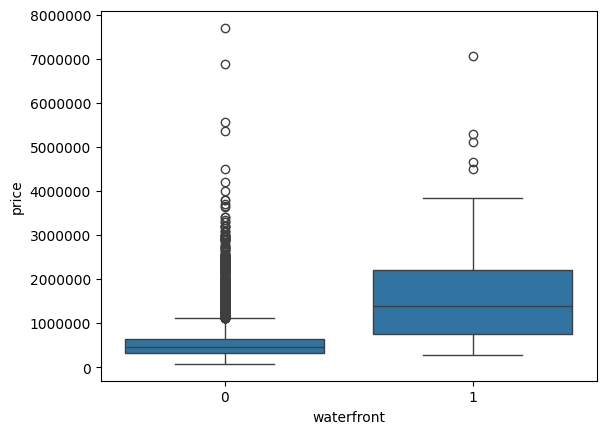

In [13]:
sns.boxplot(x = 'waterfront', y = 'price', data = df)
plt.ticklabel_format(style = 'plain', axis = 'y')

###Question 5
Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

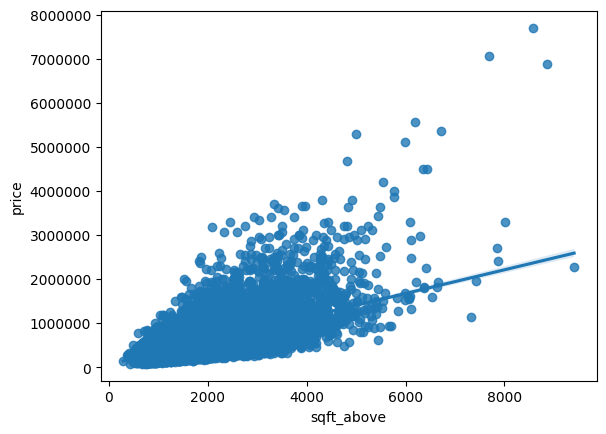

In [14]:
sns.regplot(x = 'sqft_above', y = 'price', data = df)
plt.ticklabel_format(style = 'plain', axis = 'y')

We can use the Pandas method corr() to find the feature other than price that is most correlated with price.

In [20]:
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()['price'].sort_values()
correlations

,price
zipcode,-0.053203
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369
lat,0.307003


##Module 4: Model Development
We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

In [25]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.00046769430149007363

##Question 6
Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2.

In [26]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

###Question 7
Fit a linear regression model to predict the 'price' using the list of features:

In [31]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

Then calculate the R^2. Take a screenshot of your code.

In [35]:
X = pd.get_dummies(X, drop_first=True)
X, Y = X.align(Y, join='inner', axis=0)

In [38]:
X = X.apply(pd.to_numeric, errors='coerce')
Y = pd.to_numeric(Y, errors='coerce')

In [39]:
print(X.isnull().sum())

floors            0
waterfront        0
lat               0
bedrooms         13
sqft_basement     0
view              0
bathrooms        10
sqft_living15     0
sqft_above        0
grade             0
sqft_living       0
dtype: int64


In [40]:
X = X.dropna()
Y = Y.loc[X.index]  # Ensure `Y` aligns with the updated `X`

In [41]:
X = X.fillna(X.mean())  # Replace NaNs with the mean of each column

In [42]:
X = X.fillna(0)  # Replace NaNs with 0

In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Options: 'mean', 'median', 'most_frequent', etc.
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [44]:
print(X.isnull().sum().sum())  # Should output 0

0


In [46]:
'''
X = df[features]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)
'''

lm.fit(X, Y)
print(lm.score(X, Y))

0.6578409661299081


###This will help with Question 8
Create a list of tuples, the first element in the tuple contains the name of the estimator:

'scale'

'polynomial'

'model'

The second element in the tuple contains the model constructor

StandardScaler()

PolynomialFeatures(include_bias=False)

LinearRegression()

In [47]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

###Question 8
Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

In [48]:
pipe = Pipeline(Input)
pipe.fit(X, Y)
ypipe = pipe.predict(X)
pipe.score(X, Y)

0.7513824681113679

##Module 5: Model Evaluation and Refinement
Import the necessary modules:

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:

In [50]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


###Question 9
Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

In [51]:
from sklearn.linear_model import Ridge

In [53]:
print(x_train.isnull().sum())  # Check which columns have NaNs
print(y_train.isnull().sum())  # Check if `y_train` has NaNs

floors            0
waterfront        0
lat               0
bedrooms         10
sqft_basement     0
view              0
bathrooms         7
sqft_living15     0
sqft_above        0
grade             0
sqft_living       0
dtype: int64
0


In [54]:
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]  # Ensure alignment between x_train and y_train

In [55]:
# Fill NaN with the mean of each column
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())  # Ensure test data is also handled

In [56]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Options: 'mean', 'median', 'most_frequent', etc.
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)


In [57]:
print(x_train.isnull().sum().sum())  # Should be 0
print(x_test.isnull().sum().sum())  # Should be 0

0
0


In [58]:
RigeModel = Ridge(alpha=0.1)
RigeModel.fit(x_train, y_train)
print(RigeModel.score(x_test, y_test))

0.6478807954854429


###Question 10
Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [59]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
RigeModel2=Ridge(alpha=.1)
RigeModel2.fit(x_train_pr, y_train)
RigeModel2.score(x_test_pr, y_test)

0.7003187386211895